In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Section I: Summary of Data Treatment

In [2]:
# Read in the original dataset for the NSDUH 2021 survey 
# Purpose for importing is to get descriptive statistics on much data was preserved after cleaning
file_path = 'data/NSDUH_2021_Tab.txt'

data = pd.read_csv(file_path, sep='\t')

C:\Users\e.a.wright\AppData\Local\Temp\ipykernel_33608\2939283609.py:5: DtypeWarning: Columns (2792) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='\t')


In [3]:
# Save shape of data
N_rows = data.shape[0]
N_cols = data.shape[1]

# Print shape of data in sentence
print(f"There were {N_rows} rows and {N_cols} columns in the original dataset.")

There were 58034 rows and 2988 columns in the original dataset.


In [2]:
# Read in the pre-process subset of data to be used for modeling
subset = pd.read_csv('data/model_subset.csv')

In [5]:
# Inspect subset
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53896 entries, 0 to 53895
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CATAG3      53896 non-null  int64  
 1   HEALTH2     53896 non-null  float64
 2   ANYHLTI2    53896 non-null  int64  
 3   INCOME      53896 non-null  int64  
 4   POVERTY3    53896 non-null  float64
 5   TOBFLAG     53896 non-null  int64  
 6   MRJFLAG     53896 non-null  int64  
 7   PYUD5MRJ    53896 non-null  float64
 8   MJYRTOT     53896 non-null  int64  
 9   ALCFLAG     53896 non-null  int64  
 10  COCFLAG     53896 non-null  int64  
 11  CRKFLAG     53896 non-null  int64  
 12  HERFLAG     53896 non-null  int64  
 13  LSDFLAG     53896 non-null  int64  
 14  METHAMFLAG  53896 non-null  int64  
 15  DEP         53896 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 6.6 MB


In [6]:
# Save shape of data
n_rows = subset.shape[0]
n_cols = subset.shape[1]

# Print shape of data in sentence
print(f"After cleaning and pre-processing, we were left with {n_rows} rows and {n_cols} columns in our experimental dataframe.")
# Print the percentage of individuals (rows) that were preserved
print(f"This means that {round((n_rows/N_rows)*100, 2)}% of the original dataset's rows (individuals) was preserved.")

After cleaning and pre-processing, we were left with 53896 rows and 16 columns in our experimental dataframe.
This means that 92.87% of the original dataset's rows (individuals) was preserved.


### Target: DEP - SCORE OF SYMPTOM INDICATORS 1 THRU 9 (For Depression)

### Note: DEP is a calculated variable combining the values of the Adult and Youth Depression Fields: "df['DEP'] = np.where((df['ADSMMDEA'] == 1) | (df['YODSMMDE'] == 1), 1, 0)" 

### 1 = Has 5 or more symptoms of depression
### 0 = Does not have 5 or more symptoms of depression

## Section II: Modeling

#### Important Note: Change datatype of all (0/1) variables to Boolean, this way StandardScaler() will not work on them.

In [40]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53896 entries, 0 to 53895
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CATAG3      53896 non-null  int64  
 1   HEALTH2     53896 non-null  float64
 2   ANYHLTI2    53896 non-null  int64  
 3   INCOME      53896 non-null  int64  
 4   POVERTY3    53896 non-null  float64
 5   TOBFLAG     53896 non-null  int64  
 6   MRJFLAG     53896 non-null  int64  
 7   PYUD5MRJ    53896 non-null  float64
 8   MJYRTOT     53896 non-null  int64  
 9   ALCFLAG     53896 non-null  int64  
 10  COCFLAG     53896 non-null  int64  
 11  CRKFLAG     53896 non-null  int64  
 12  HERFLAG     53896 non-null  int64  
 13  LSDFLAG     53896 non-null  int64  
 14  METHAMFLAG  53896 non-null  int64  
 15  DEP         53896 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 6.6 MB


In [41]:
subset.columns

Index(['CATAG3', 'HEALTH2', 'ANYHLTI2', 'INCOME', 'POVERTY3', 'TOBFLAG',
       'MRJFLAG', 'PYUD5MRJ', 'MJYRTOT', 'ALCFLAG', 'COCFLAG', 'CRKFLAG',
       'HERFLAG', 'LSDFLAG', 'METHAMFLAG', 'DEP'],
      dtype='object')

In [42]:
subset.head()

,CATAG3,HEALTH2,ANYHLTI2,INCOME,POVERTY3,TOBFLAG,MRJFLAG,PYUD5MRJ,MJYRTOT,ALCFLAG,COCFLAG,CRKFLAG,HERFLAG,LSDFLAG,METHAMFLAG,DEP
0,3,4.0,1,1,2.0,1,1,0.0,52,1,0,0,0,0,0,0
1,5,3.0,1,4,3.0,1,0,0.0,0,1,0,0,0,0,0,0
2,2,2.0,1,2,2.0,0,0,0.0,0,1,0,0,0,0,0,0
3,4,2.0,1,2,2.0,1,1,1.0,364,1,0,0,0,0,0,0
4,2,1.0,2,1,1.0,0,0,0.0,0,0,0,0,0,0,0,0


In [43]:
subset.PYUD5MRJ.value_counts()

0.0    50264
1.0     3632
Name: PYUD5MRJ, dtype: int64

In [16]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53896 entries, 0 to 53895
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CATAG3      53896 non-null  int64  
 1   HEALTH2     53896 non-null  float64
 2   ANYHLTI2    53896 non-null  int64  
 3   INCOME      53896 non-null  int64  
 4   POVERTY3    53896 non-null  float64
 5   TOBFLAG     53896 non-null  bool   
 6   MRJFLAG     53896 non-null  bool   
 7   PYUD5MRJ    53896 non-null  bool   
 8   MJYRTOT     53896 non-null  int64  
 9   ALCFLAG     53896 non-null  bool   
 10  COCFLAG     53896 non-null  bool   
 11  CRKFLAG     53896 non-null  bool   
 12  HERFLAG     53896 non-null  bool   
 13  LSDFLAG     53896 non-null  bool   
 14  METHAMFLAG  53896 non-null  bool   
 15  DEP         53896 non-null  bool   
dtypes: bool(10), float64(2), int64(4)
memory usage: 3.0 MB


In [4]:
# Import Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Import SMOTE for oversampling of the minority class
from imblearn.over_sampling import SMOTE # synthetically generates new samples from the minority class

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ColumnTransformer for proper scaling of mixed data
from sklearn.compose import ColumnTransformer

# Import train_test_split and metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler # this randomly reuses samples from the minority class

In [5]:
# Check for class imbalance in the target variable
subset.DEP.value_counts()

False    42771
True     11125
Name: DEP, dtype: int64

In [5]:
# Instantiate a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Define X and y
X = subset.drop('DEP', axis=1)
y = subset['DEP']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled) # Here the resampled X_train data is scaled
X_test_scaled = scaler.transform(X_test) # Here the original X_test data is scaled as it was not resampled

# Note: you do not need to scale the target variable (y). 

# Fit the model to the oversampled training data
gbc.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on the test data
y_pred = gbc.predict(X_test_scaled)

# Return a classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78     10684
           1       0.34      0.55      0.42      2790

    accuracy                           0.68     13474
   macro avg       0.60      0.64      0.60     13474
weighted avg       0.75      0.68      0.71     13474



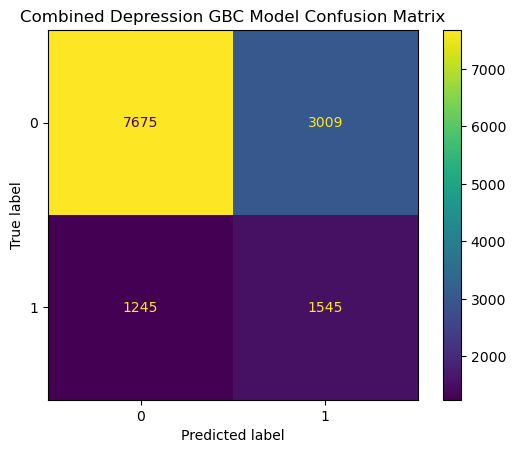

In [6]:
# Print a pretty confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=gbc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=gbc.classes_)

# Display the confusion matrix
disp.plot()
# Set the title of the plot
plt.title('Combined Depression GBC Model Confusion Matrix')
plt.show()

In [7]:
# Find predicted probabilities for each class
predicted_probs = gbc.predict_proba(X_test)[:, 1]

# Print

c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [.70, .75, .80, .85, .90, .95] 

for threshold in thresholds:
    predicted_labels = (predicted_probs > threshold).astype(int)
    conf_matrix = confusion_matrix(y_test, predicted_labels)
    
    tn, fp, fn, tp = conf_matrix.ravel()
    
    precision = precision_score(y_test, predicted_labels)
    recall = recall_score(y_test, predicted_labels)
    f1 = f1_score(y_test, predicted_labels)
    
    print(f"Threshold: {threshold:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1-Score: {f1:.2f}")
    print(f"Confusion Matrix:")
    print(f"TN: {tn} | FP: {fp}")
    print(f"FN: {fn} | TP: {tp}")
    print()

Threshold: 0.70 | Precision: 0.21 | Recall: 0.54 | F1-Score: 0.30
Confusion Matrix:
TN: 4975 | FP: 5709
FN: 1280 | TP: 1510

Threshold: 0.75 | Precision: 0.21 | Recall: 0.53 | F1-Score: 0.30
Confusion Matrix:
TN: 5012 | FP: 5672
FN: 1316 | TP: 1474

Threshold: 0.80 | Precision: 0.18 | Recall: 0.29 | F1-Score: 0.22
Confusion Matrix:
TN: 6925 | FP: 3759
FN: 1987 | TP: 803

Threshold: 0.85 | Precision: 0.14 | Recall: 0.16 | F1-Score: 0.15
Confusion Matrix:
TN: 8000 | FP: 2684
FN: 2352 | TP: 438

Threshold: 0.90 | Precision: 0.13 | Recall: 0.14 | F1-Score: 0.13
Confusion Matrix:
TN: 8199 | FP: 2485
FN: 2410 | TP: 380

Threshold: 0.95 | Precision: 0.16 | Recall: 0.08 | F1-Score: 0.10
Confusion Matrix:
TN: 9538 | FP: 1146
FN: 2574 | TP: 216



In [40]:
# Choose a different threshold based on the findings above

chosen_threshold = 0.75  # Replace with your chosen threshold
final_predictions = (predicted_probs > chosen_threshold).astype(int)

In [41]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, final_predictions)
print(conf_matrix)

[[5012 5672]
 [1316 1474]]


In [42]:
# Print classification report based on final_predictions
print(classification_report(y_test, final_predictions))

              precision    recall  f1-score   support

           0       0.79      0.47      0.59     10684
           1       0.21      0.53      0.30      2790

    accuracy                           0.48     13474
   macro avg       0.50      0.50      0.44     13474
weighted avg       0.67      0.48      0.53     13474



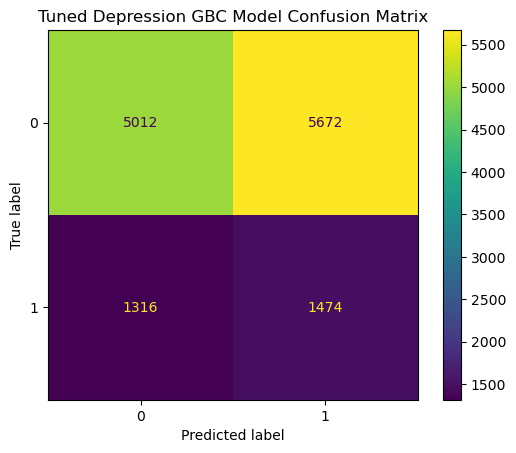

In [43]:
# Print a pretty confusion matrix

cm = confusion_matrix(y_test, final_predictions, labels=gbc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=gbc.classes_)

# Display the confusion matrix
disp.plot()
# Set the title of the plot
plt.title('Tuned Depression GBC Model Confusion Matrix')
plt.show()

In [33]:
# Create feature importance dataframe to analyze the importance of each feature
fi_values = gbc.feature_importances_
features = X_train.columns
# Create dataframe
feature_importance_df = pd.DataFrame({"feature": features, "feature_importance": fi_values})
# Sort in descending order
feature_importance_df = feature_importance_df.sort_values(by="feature_importance", ascending = False)
# View dataframe
feature_importance_df

,feature,feature_importance
1,HEALTH2,0.362204
0,CATAG3,0.266727
6,MRJFLAG,0.115889
7,PYUD5MRJ,0.080821
4,POVERTY3,0.056055
2,ANYHLTI2,0.040701
9,ALCFLAG,0.029343
8,MJYRTOT,0.027589
3,INCOME,0.011978
5,TOBFLAG,0.005321


## Section III: Confirming Validity of DEP against age-specific depression targets

### Before proceeding, use CATAG3 to create an ADULT dataframe and a YOUTH dataframe each with their appropriate target column

In [45]:
# Read in subset_three_targets.csv
df = pd.read_csv('data/subset_three_targets.csv')

In [46]:
# Create ADULT dataframe (CATAG3 == 2, 3, or 4)
ADULT = df[df['CATAG3'].isin([2,3,4])]

# Drop the YODSMMDE and DEP columns from ADULT dataframe
ADULT = ADULT.drop(['YODSMMDE', 'DEP'], axis=1)

# Create YOUTH dataframe (CATAG3 == 1)
YOUTH = df[df['CATAG3'].isin([1])]

# Drop the ADSMMDEA and DEP columns from YOUTH dataframe
YOUTH = YOUTH.drop(['ADSMMDEA', 'DEP'], axis=1)

In [23]:
# Inspect the value counts of the target variables for ADULT
adultVC = ADULT.ADSMMDEA.value_counts()

adultVC

0    25813
1     7364
Name: ADSMMDEA, dtype: int64

In [24]:
# Percent Adult's with Depression
percent_adults_depression = round(adultVC[1]/(adultVC[0]+adultVC[1]), 2)*100 # Round to 2 decimal places

# Print
print(f"Percent of Adults with Depression: {percent_adults_depression}%")

Percent of Adults with Depression: 22.0%


In [25]:
# Inspect the value counts of the target variables for YOUTH
youthVC = YOUTH.YODSMMDE.value_counts()

youthVC

0    7684
1    2557
Name: YODSMMDE, dtype: int64

In [26]:
# Percent YOUTH with Depression
percent_youth_depression = round(youthVC[1]/(youthVC[0]+youthVC[1]), 2)*100 # Round to 2 decimal places

# Print
print(f"Percent of Adults with Depression: {percent_youth_depression}%")

Percent of Adults with Depression: 25.0%


### Train and test a model on ADULT dataset

In [51]:
# Instantiate a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Define X and y
X = ADULT.drop('ADSMMDEA', axis=1)
y = ADULT['ADSMMDEA']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled) # Here the resampled X_train data is scaled
X_test_scaled = scaler.transform(X_test) # Here the original X_test data is scaled as it was not resampled

# Note: you do not need to scale the target variable (y). 

# Fit the model to the oversampled training data
gbc.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on the test data
y_pred = gbc.predict(X_test_scaled)

# Return a classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.70      0.77      6423
           1       0.35      0.53      0.42      1872

    accuracy                           0.67      8295
   macro avg       0.59      0.62      0.59      8295
weighted avg       0.73      0.67      0.69      8295



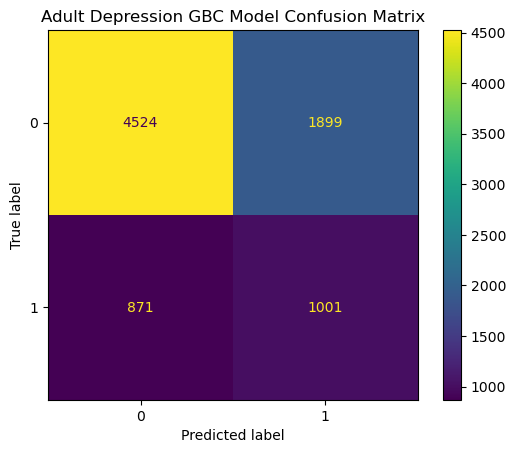

In [53]:
# Make a confusion matrix using Sklearn

cm = confusion_matrix(y_test, y_pred, labels=gbc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=gbc.classes_)

# Display the confusion matrix
disp.plot()
# Set the title of the plot
plt.title('Adult Depression GBC Model Confusion Matrix')
plt.show()

In [55]:
# Create feature importance dataframe to analyze the importance of each feature
fi_values = gbc.feature_importances_
features = X_train.columns
# Create dataframe
adult_feature_importance_df = pd.DataFrame({"feature": features, "adult_feature_importance": fi_values})
# Sort in descending order
adult_feature_importance_df = adult_feature_importance_df.sort_values(by="adult_feature_importance", ascending = False)
# View dataframe
adult_feature_importance_df

,feature,adult_feature_importance
1,HEALTH2,0.440975
6,MRJFLAG,0.145312
7,PYUD5MRJ,0.090688
0,CATAG3,0.083567
4,POVERTY3,0.072345
2,ANYHLTI2,0.064079
8,MJYRTOT,0.040727
3,INCOME,0.025015
9,ALCFLAG,0.021143
5,TOBFLAG,0.009005


In [56]:
# Top 9 Features 

# Select first 9 features from adult_feature_importance_df
Top9_adult = adult_feature_importance_df['feature'][:9]

# Convert into list
Top9_adult = Top9_adult.tolist()

# Inspect
Top9_adult

['HEALTH2',
 'MRJFLAG',
 'PYUD5MRJ',
 'CATAG3',
 'POVERTY3',
 'ANYHLTI2',
 'MJYRTOT',
 'INCOME',
 'ALCFLAG']

### Rerun model with only the top 9 ADULT features


In [58]:
# Retrain and test model using Top9_adult as X

# Instantiate a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Define X and y
X = ADULT[['HEALTH2',
            'MRJFLAG',
            'PYUD5MRJ',
            'CATAG3', # Further explore age variables for ADULT
            'POVERTY3',
            'ANYHLTI2',
            #'MJYRTOT',
            #'INCOME',
            #'ALCFLAG'
            ]]
y = ADULT['ADSMMDEA']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled) # Here the resampled X_train data is scaled
X_test_scaled = scaler.transform(X_test) # Here the original X_test data is scaled as it was not resampled

# Note: you do not need to scale the target variable (y). 

# Fit the model to the oversampled training data
gbc.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on the test data
y_pred = gbc.predict(X_test_scaled)

# Return a classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.60      0.70      6423
           1       0.32      0.64      0.42      1872

    accuracy                           0.61      8295
   macro avg       0.58      0.62      0.56      8295
weighted avg       0.73      0.61      0.64      8295



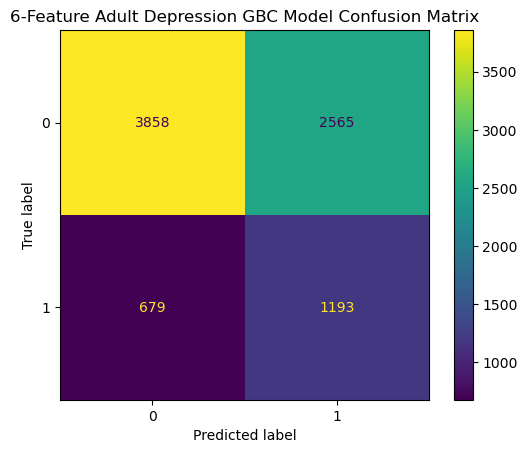

In [59]:
# Print a pretty confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=gbt.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=gbt.classes_)

# Display the confusion matrix
disp.plot()
# Set the title of the plot
plt.title('6-Feature Adult Depression GBC Model Confusion Matrix')
plt.show()

### Train Model with YOUTH data

In [60]:
# Instantiate a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Define X and y
X = YOUTH.drop('YODSMMDE', axis=1)
y = YOUTH['YODSMMDE']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled) # Here the resampled X_train data is scaled
X_test_scaled = scaler.transform(X_test) # Here the original X_test data is scaled as it was not resampled

# Note: you do not need to scale the target variable (y).

# Fit the model to the oversampled training data
gbc.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on the test data
y_pred = gbc.predict(X_test_scaled)

# Return a classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1937
           1       0.37      0.56      0.45       624

    accuracy                           0.67      2561
   macro avg       0.60      0.63      0.60      2561
weighted avg       0.72      0.67      0.68      2561



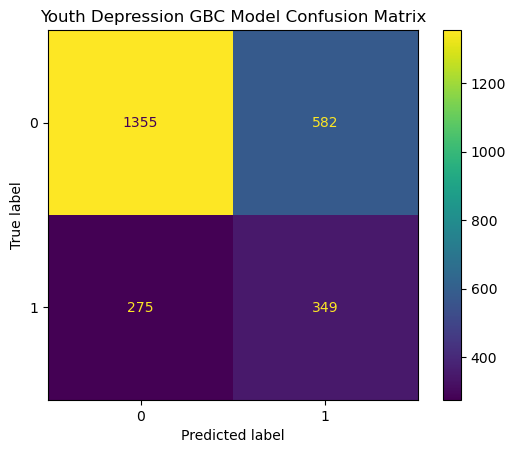

In [61]:
# Print a confusion matrix for the model
cm = confusion_matrix(y_test, y_pred, labels=gbc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=gbc.classes_)

# Display the confusion matrix
disp.plot()
# Set the title of the plot
plt.title('Youth Depression GBC Model Confusion Matrix')
plt.show()

In [63]:
# Create feature importance dataframe to analyze the importance of each feature
fi_values = gbc.feature_importances_
features = X_train.columns
# Create dataframe
youth_feature_importance_df = pd.DataFrame({"feature": features, "youth_feature_importance": fi_values})
# Sort in descending order
youth_feature_importance_df = youth_feature_importance_df.sort_values(by="youth_feature_importance", ascending = False)
# View dataframe
youth_feature_importance_df

,feature,youth_feature_importance
1,HEALTH2,0.499813
9,ALCFLAG,0.244815
6,MRJFLAG,0.070116
4,POVERTY3,0.041385
8,MJYRTOT,0.039888
7,PYUD5MRJ,0.034001
3,INCOME,0.026361
2,ANYHLTI2,0.017742
5,TOBFLAG,0.016949
10,COCFLAG,0.004962


In [64]:
# Select the top 6 features from the YOUTH model

# Select first 9 features from adult_feature_importance_df
Top6_youth = youth_feature_importance_df['feature'][:6]

# Convert into list
Top6_youth = Top6_youth.tolist()

# Inspect
Top6_youth

['HEALTH2', 'ALCFLAG', 'MRJFLAG', 'POVERTY3', 'MJYRTOT', 'PYUD5MRJ']

### Note: Communicate these findings to the group and use them to inform Pycaret model feature selection.

In [65]:
# Merge the two feature importance dataframes (adult_feature_importance_df and youth_feature_importance_df) on ['feature']

FEATURE_IMPORTANCES = pd.merge(feature_importance_df, adult_feature_importance_df, on=['feature'], how='outer')

# Merge FEATURE_IMPORTANCES with youth_feature_importance_df on ['feature']
FEATURE_IMPORTANCES = pd.merge(FEATURE_IMPORTANCES, youth_feature_importance_df, on=['feature'], how='outer')

# Inspect

FEATURE_IMPORTANCES

,feature,feature_importance,adult_feature_importance,youth_feature_importance
0,HEALTH2,0.362204,0.440975,0.499813
1,CATAG3,0.266727,0.083567,0.000000
2,MRJFLAG,0.115889,0.145312,0.070116
3,PYUD5MRJ,0.080821,0.090688,0.034001
4,POVERTY3,0.056055,0.072345,0.041385
5,ANYHLTI2,0.040701,0.064079,0.017742
6,ALCFLAG,0.029343,0.021143,0.244815
7,MJYRTOT,0.027589,0.040727,0.039888
8,INCOME,0.011978,0.025015,0.026361
9,TOBFLAG,0.005321,0.009005,0.016949


C:\Users\e.a.wright\AppData\Local\Temp\ipykernel_31232\2327115218.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  melted_data = pd.melt(FEATURE_IMPORTANCES, id_vars='feature', var_name='iteration', value_name='feature_importance')


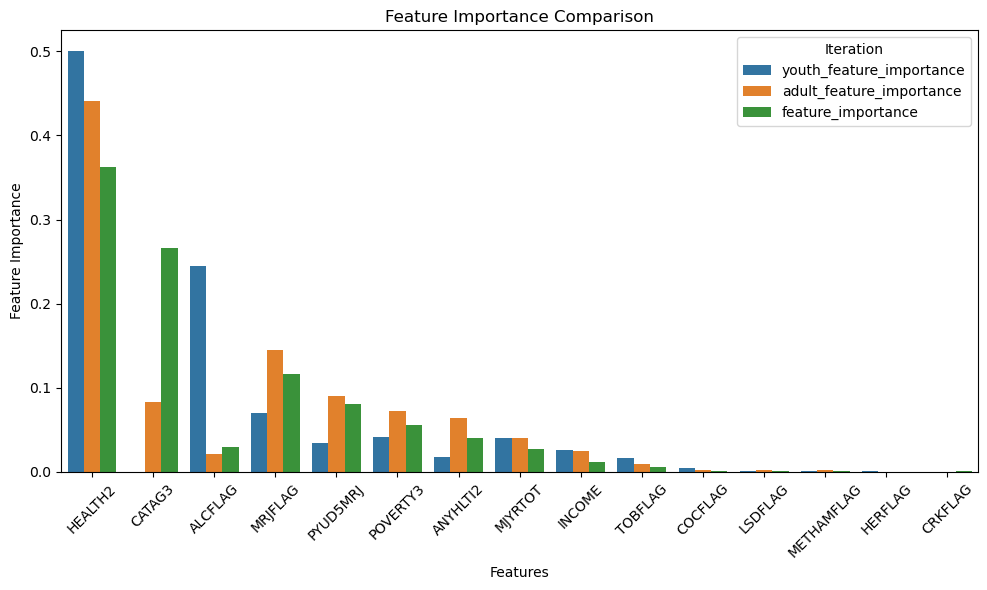

In [66]:
# Melting the data to create a single importance column for both iterations
melted_data = pd.melt(FEATURE_IMPORTANCES, id_vars='feature', var_name='iteration', value_name='feature_importance')

# Sorting data by feature importance for better visualization
melted_data = melted_data.sort_values(by='feature_importance', ascending=False)

# Create a bar plot using Seaborn with bars side by side
plt.figure(figsize=(10, 6))
sns.barplot(x='feature', y='feature_importance', hue='iteration', data=melted_data)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Comparison')
plt.xticks(rotation=45)
plt.legend(title='Iteration')
plt.tight_layout()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Ensembled sampling
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedBaggingClassifier

In [13]:
subset = subset.dropna()

In [14]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53896 entries, 0 to 53911
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CATAG3      53896 non-null  int64  
 1   HEALTH2     53896 non-null  float64
 2   ANYHLTI2    53896 non-null  int64  
 3   INCOME      53896 non-null  int64  
 4   POVERTY3    53896 non-null  float64
 5   TOBFLAG     53896 non-null  int64  
 6   MRJFLAG     53896 non-null  int64  
 7   PYUD5MRJ    53896 non-null  float64
 8   MJYRTOT     53896 non-null  int64  
 9   ALCFLAG     53896 non-null  int64  
 10  COCFLAG     53896 non-null  int64  
 11  CRKFLAG     53896 non-null  int64  
 12  HERFLAG     53896 non-null  int64  
 13  LSDFLAG     53896 non-null  int64  
 14  METHAMFLAG  53896 non-null  int64  
 15  ADDPREV     53896 non-null  int64  
 16  ADSMMDEA    53896 non-null  int64  
 17  YODSMMDE    53896 non-null  int64  
 18  DEP         53896 non-null  int64  
dtypes: float64(3), int64(16)
